In [69]:
# !pip install pytesseract

In [70]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cv2 
import imutils 
import easyocr
import time
import pytesseract

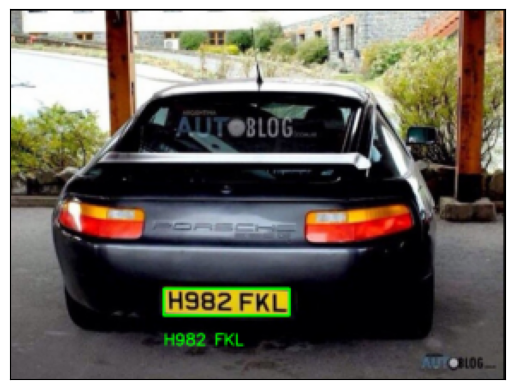

In [54]:
img = cv2.imread('CarPlate.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([])
plt.yticks([])
plt.show()

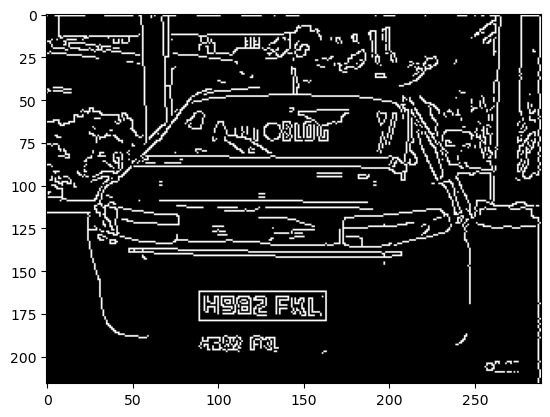

In [48]:
blur = cv2.bilateralFilter(gray, 11, 20,15)
canny = cv2.Canny(blur, 170,200)
plt.imshow(canny, cmap= 'gray')

In [25]:
locations=[]
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10,True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[ 89, 162]],

       [[ 89, 179]],

       [[163, 179]],

       [[163, 162]]], dtype=int32)

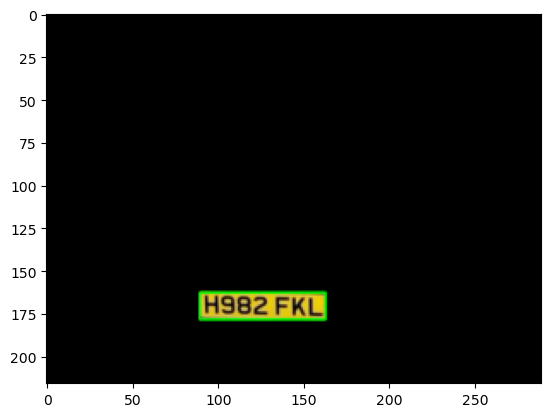

In [26]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [27]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
(x1, y1),(x2, y2)

((162, 89), (179, 163))

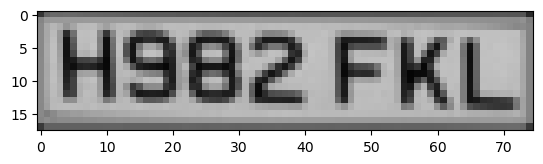

In [28]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [8]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [75, 0], [75, 18], [0, 18]], 'H982 FKL', 0.625563615807226)]

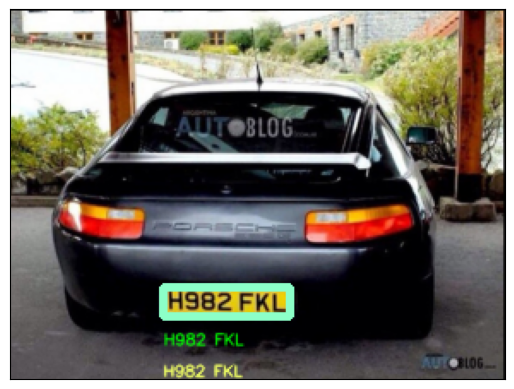

In [55]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+35), 
                  fontFace=font, fontScale=0.3, color=(100,255,240), thickness=1,lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (200,255,140),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
cascade_src = r'HaarCascade/cars1.xml'

video_src = r'HaarCascade/video3.mp4'

#line a
ax1=70
ay=90
ax2=230



#line b
bx1=15
by=125
bx2=225


def Speed_Cal(time):
    try:        
        Speed = (9.144/1000)/(time/3600)                
        return Speed
    except ZeroDivisionError :
        print ("can not devide by zero")

i = 1

start_time = time.time()
cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)

print(cap.isOpened())
while cap.isOpened():
    
    ret, img = cap.read()       
    if not ret:
        break

    blurred = cv2.blur(img,ksize=(15,15))
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)      
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)
    
    cv2.line(img,(ax1,ay),(ax2,ay),(255,0,0),2)        
    cv2.line(img,(bx1,by),(bx2,by),(255,0,0),2) 
    
    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.circle(img,(int((x+x+w)/2),int((y+y+h)/2)),5,(0,255,0),-1)
        

        if int((y + y+h)/2)-3 < int(ay) <= int((y + y+h)/2)+3:
            cv2.line(img,(ax1,ay),(ax2,ay),(0,255,0),2)
            start_time = time.time()
            
        if int(by) <= int((y+y+h)/2) & int( by + 10 ) >= int(( y + y+h)/2):
            cv2.line(img,(bx1,by),(bx2,by),(0,255,0),2) 
            Speed = Speed_Cal(time.time() - start_time)
            print("Car Number "+str(i)+" Speed: "+str(round(Speed,2))+ " KM/H ")
            i = i + 1
    
    cv2.imshow('video', img)
    if cv2.waitKey(33) == 27:
        break

cap.release()#close cam

cv2.destroyAllWindows() 

True
Car Number 1 Speed: 87.78 KM/H 
Car Number 2 Speed: 63.68 KM/H 
Car Number 3 Speed: 70.2 KM/H 
Car Number 4 Speed: 87.78 KM/H 
Car Number 5 Speed: 77.74 KM/H 
Car Number 6 Speed: 78.97 KM/H 
Car Number 7 Speed: 27.33 KM/H 
Car Number 8 Speed: 26.31 KM/H 
Car Number 9 Speed: 70.0 KM/H 
Car Number 10 Speed: 62.51 KM/H 
Car Number 11 Speed: 75.25 KM/H 
Car Number 12 Speed: 63.66 KM/H 
Car Number 13 Speed: 58.36 KM/H 
Car Number 14 Speed: 61.59 KM/H 


In [102]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
img1 = cv2.imread('testOCR.PNG')
img2 = img1.copy()
height, width, _ =img.shape
# print(height,width)

boxes = pytesseract.image_to_boxes(img1, lang='eng')
for box in boxes.splitlines():
    box = box.split()
    x,y2,x2,y = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(img1, (x, height-y),(x2, height-y2),(0,255,0),1)
    cv2.putText(img1, box[0],(x, height-y2-30),
                cv2.FONT_HERSHEY_COMPLEX,.5,(0,0,255),1)


# --------to get only digit --------
config = '--oem 3 --psm 6 outputbase digits' 
data = pytesseract.image_to_data(img2, config= config, lang='eng',output_type=pytesseract.Output.DICT)
for i in range(len(data['text'])):
    if data['text'][i]:
        x = data['left'][i]
        y = data['top'][i]
        w = data['width'][i]
        h = data['height'][i]
        cv2.rectangle(img2, (x, y),(x+w,y+h),(0,255,0),1)
        cv2.putText(img2, data['text'][i],(x, y-2),
                    cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
cv2.imshow('img',img1)
cv2.imshow('image2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## [Arabic text Recognition then convert text to speech](https://colab.research.google.com/drive/1MhGSZYAI0GOfv2es_E7S0EwHSDyiStna#scrollTo=d15077d2)